In [1]:
import pylab as pl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA 
from sklearn.svm import SVC


### Load dataset with people faces. 

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
n_samples, h, w = lfw_people.images.shape
np.random.seed(42)

In [3]:
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names
print(y)

[5 6 3 ... 5 3 5]


### Visualize images

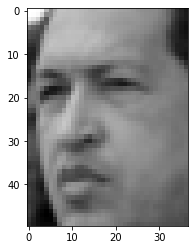

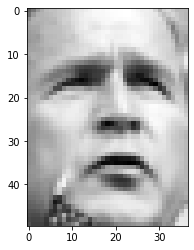

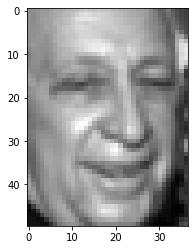

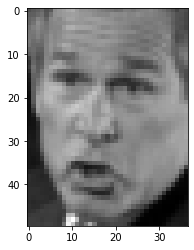

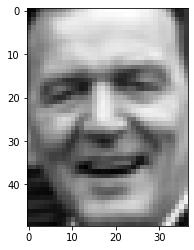

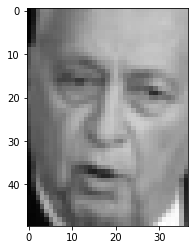

In [4]:
for i in range(10):
    plt.imshow(lfw_people.images[i], cmap= 'gray')
    plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



### Train SVM

In [8]:
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_trainpca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.01)


In [9]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(X_testpca)

Predicting the people names on the testing set


In [10]:
print(classification_report(y_test, y_pred, target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.59      0.77      0.67        13
     Colin Powell       0.83      0.92      0.87        60
  Donald Rumsfeld       0.68      0.56      0.61        27
    George W Bush       0.87      0.90      0.88       146
Gerhard Schroeder       0.75      0.72      0.73        25
      Hugo Chavez       0.77      0.67      0.71        15
       Tony Blair       0.86      0.69      0.77        36

         accuracy                           0.82       322
        macro avg       0.76      0.75      0.75       322
     weighted avg       0.82      0.82      0.82       322



In [11]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.8198757763975155


In [12]:
print(confusion_matrix(y_test, y_pred))

[[ 10   1   1   1   0   0   0]
 [  0  55   1   4   0   0   0]
 [  4   2  15   5   1   0   0]
 [  1   4   4 131   1   2   3]
 [  0   0   1   5  18   1   0]
 [  0   2   0   1   1  10   1]
 [  2   2   0   4   3   0  25]]


In [49]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        plt.show()

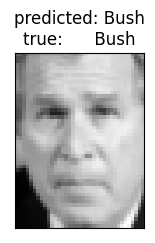

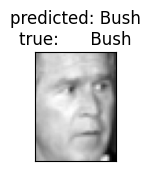

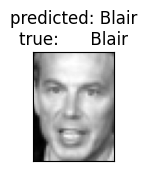

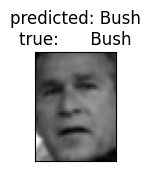

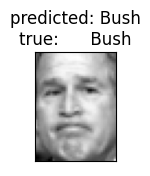

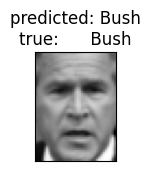

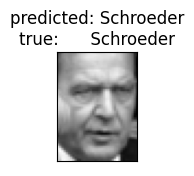

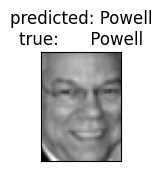

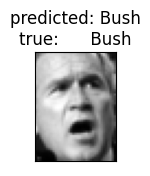

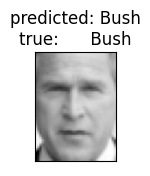

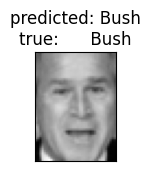

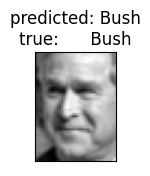

In [50]:
prediction_titles = [title(y_pred, y_test, target_names, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(X_test, prediction_titles, h, w)




## Curse of dimensionality?
How could we reduce number of dimensions?


In [6]:
n_components = 50
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
# eigenfaces = pca.components_.reshape((n_components, h, w))

In [7]:
X_trainpca = pca.transform(X_train)
X_testpca = pca.transform(X_test)
